# Importing Data 

In [28]:
import numpy as np
import os
from scipy import signal
import UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
import RockSat_1_14_fitting_functions as R_fitting
import json
import pandas as pd
import matplotlib.pyplot as plt
from RockSat_json import *

In [29]:
year = 2021
#packets = import_data(f'../{year}/{year}_packet.json')
packets = import_data(f'../packets/{year}_packet.json')

In [52]:
alt = pd.read_csv('DQCA_quicklook_Fri_Jun_25_08_31_59_2021 (3).dat', skiprows = 3, sep = '\t')
print(alt.keys())
alt['Elapsed']


Index(['Elapsed', 'Unnamed: 1', '  GMT', 'Unnamed: 3', 'Unnamed: 4',
       'Altitude       Hor Range      Velocity', '      PP Lat',
       '     PP Long', '      Best   M    Q   T'],
      dtype='object')


0        Time
1        -0.5
2        -0.4
3        -0.3
4        -0.2
        ...  
8493    848.6
8494    848.7
8495    848.8
8496    848.9
8497    849.0
Name: Elapsed, Length: 8498, dtype: object

In [14]:
def get_sweep(sw, cn = 0):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

In [25]:
print(packets['packets']['Medium']['1'].keys())

dict_keys(['Start', 'Stop', 'Count', 'Voltage', 'Current0', 'Current1', 'Current2'])


In [31]:
ne_tot = []
te_tot = []
t = []
ctot = np.array([])
sw_tot = np.arange(0,int(len(packets['packets']['Medium']))) #Every single sweep
for i in sw_tot[0:2200]:
    V = packets['packets']['Medium'][f'{i}']['Voltage']
    I = packets['packets']['Medium'][f'{i}']['Current0']
    x, y, popt,pcov = R_fitting.gen_fit(np.array(V), np.array(I))
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'])
    ctot = np.append(ctot, packets['packets']['Medium'][f'{i}']['Count'])
    ne = popt[3] * 10**(-6) # To convert into cm^-3
    te = popt[4]

    ne_tot.append(ne)
    te_tot.append(te)
    t.append(start)

/Users/joshuagoodwill/Library/CloudStorage/GoogleDrive-goodwill@udel.edu/My Drive/DAPPEr/RockSat_1_14_fitting_functions.py:44: RuntimeWarning: invalid value encountered in sqrt
  return I0 * np.sqrt(1. + k*(x + V0))


In [39]:
fit = pd.DataFrame({'c': ctot,
             't': t,
             'ne': ne_tot,
             'Te': te_tot,})

fit.to_csv('fits.csv')

In [65]:
alt.keys()
alt['Altitude       Hor Range      Velocity']

0           (Ft)
1          142.4
2          141.9
3          141.5
4          141.3
          ...   
8493    183029.2
8494    183029.2
8495    183029.2
8496    183029.2
8497    183029.2
Name: Altitude       Hor Range      Velocity, Length: 8498, dtype: object

In [57]:
np.round(fit['t']/1000,1)

0        50.0
1        50.1
2        50.2
3        50.2
4        50.3
        ...  
2195    273.0
2196    273.0
2197    273.1
2198    273.2
2199    273.3
Name: t, Length: 2200, dtype: float64

In [83]:
fitr = np.round(fit['t']/1000,1)
# print(alt['Elapsed'])
print(fitr)
fitr[np.array(fitr['t']) == np.array(alt['Elapsed'])]

0        50.0
1        50.1
2        50.2
3        50.2
4        50.3
        ...  
2195    273.0
2196    273.0
2197    273.1
2198    273.2
2199    273.3
Name: t, Length: 2200, dtype: float64


KeyError: 't'

(0.0, 1000.0)

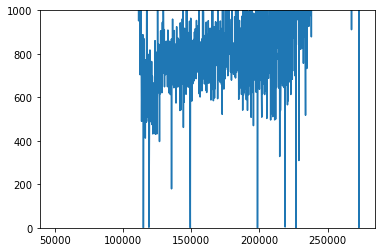

In [96]:
plt.plot(fit['t'], fit['Te'])
plt.ylim(0,1000)

# Get Sweep and Saving Figures

In [11]:
def get_sweep(sw, cn = 0):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

In [12]:
sw_range = np.arange(0,int(len(packets['packets']['Medium'])), 100) 

FileNotFoundError: [Errno 2] No such file or directory: '../2021/Sweeps/sw_0.jpg'

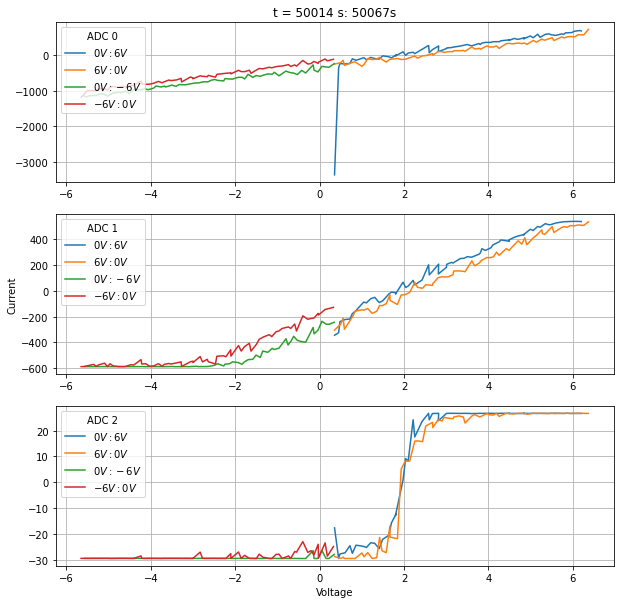

In [13]:
cn = 0
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in sw_range:
  for axnum in np.arange(len(axs)):
    axs[axnum].clear()
    cn = axnum
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'], cn = cn)

    axs[axnum].plot(V1, I1 , label = r'$ 0V : 6V$')
    axs[axnum].plot(V2, I2 , label = r'$ 6V:  0V$')
    axs[axnum].plot(V3, I3 , label = r'$ 0V: -6V$')
    axs[axnum].plot(V4, I4 , label = r'$-6V : 0V$')
    axs[axnum].legend(title = f'ADC {cn}', loc = 'upper left')
    axs[axnum].grid()
  axs[0].set_title(f't = {start} s: {stop}s')
  axs[2].set_xlabel('Voltage')
  axs[1].set_ylabel('Current')
  plt.savefig(f'../{year}/Sweeps/sw_{i}.jpg' , dpi = 400) 

# Objective for 3/20

Use gen fit 
 * popt = optimize parameters
  t is x, y is model 
extract popt  it will be an array of values array of values
* (Around 30)
Plot it to check to see if you have a good fit 

**Note**: Use Sweeps 1000 - 1900 as they show the best IV curves

* x, y, popt, pcov = genfit(V, I)
    * x and y will be your fitted IV curve
    * popt is an array of m, b ,and a
* look at electron saturation region eq, inside equation is B, get Te from that since everything is a constant besdies Te
* Look at line 44 in rock sat fitting functions 

In [ ]:
V = packets['packets']['Medium']['1000']['Voltage']
I = packets['packets']['Medium']['1000']['Current0']

Use log linear fit for voltage instead of normal linear fit

In [ ]:
# From Sweep 1000 to 1800 

In [ ]:
x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I)) # x is V, y is I
#print(x)
#print(y)
print(popt) #popt[0:xa,1:b,2:m1,3:n,4:t,5:V0] from rocksat fitting functions
#print(pcov)  
#plt.plot(x,y)

[ 5.34172231e-01 -3.81171970e+00  1.46941755e+02  6.10158388e+10
  8.65397277e+02 -5.67603410e-01]


In [ ]:
popt[0]

0.5341722309513347

In [ ]:
#Don't worry about this for now
#for i in range(len(pcov)):
    #print(pcov[i][i])

0.0007252135352356753
23106.924451542698
241200.16424548868
2.7017678873964273e+18
2.903715803212709e+17
2157825909.49563


_Q_: What are the units for the output?
* T is in Kelvin
* n is in m^3

Is it a good fit?

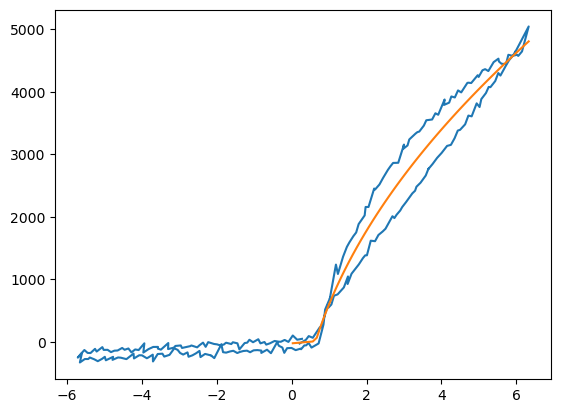

In [ ]:
plt.plot(V,I)
plt.plot(x,y)
# Limit to 1 V 

In [ ]:
sw_good = np.arange(1000,int(len(packets['packets']['Medium'],)), 100) 

In [ ]:
sweep = [] #List of sweeps between 1000 and 1900 
for i in range(len(sw_good)):
    if sw_good[i] < 1900: 
        sweep.append(sw_good[i])

print(sweep)

[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]


Text(0, 0.5, 'Density')

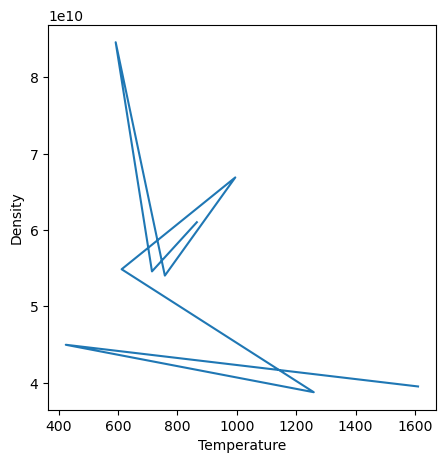

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
n = []
t = []
for i in range(len(sweep)):
  sweep_num = sweep[i]
  V = packets['packets']['Medium'][f'{sweep_num}']['Voltage']
  I = packets['packets']['Medium'][f'{sweep_num}']['Current0']
  x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  n.append(popt[3])
  t.append(popt[4])
  #x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  
    

ax.plot(t,n)    
#ax[0].set_title(f't = {start} s: {stop}s')
ax.set_xlabel('Temperature')
ax.set_ylabel('Density')
#plt.savefig(f'../{year}/Sweeps/sw_{i}.jpg' , dpi = 400) 

In [ ]:
for i in range(len(t)):
    print(t[i])


865.39727749284
714.2560287390756
591.9824578331031
757.660017407393
994.9074873369086
612.0910972712978
1259.2863605721182
423.8617712847565
1610.4500833214156


In [ ]:
for i in range(len(n)):
    print(n[i])

61015838792.71766
54573412938.77113
84594525046.6829
54023121824.07938
66884863541.768036
54855489653.18692
38746393858.670784
44963054703.13971
39500821969.14007


#### Testing

In [ ]:
for i in range(len(sweep)):
    x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))

In [ ]:
n_test = []
t_test = []
for i in range(2):
  sweep_num = sweep[i]
  V = packets['packets']['Medium'][f'{sweep_num}']['Voltage']
  I = packets['packets']['Medium'][f'{sweep_num}']['Current0']
  x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  n_test.append(popt[3])
  t_test.append(popt[4])

In [ ]:
n_test

[61015838792.71766, 54573412938.77113]

In [86]:
#x = packets['packets']['Medium']['0']
import scipy.interpolate as interpolate

In [87]:
def readTele(fileName):
    """
    Extracts the data from telemetry file
    
    Parameters
    ----------
    fileName : String
        Name of the file, should be telemetry file DQCA_quicklook...

    Returns
    -------
    flightTime : list
        list of the times from telemetry
    altitude : list
    
    horRange : list
    
    velocity : list

    """
    teleFile = open(fileName, "r")
    #get rid of the first 5 lines which hold no data
    for line in range(5):
        teleFile.readline()
    
    fileArr = teleFile.readlines()
    
    arrLen = len(fileArr)
    
    flightTime = []
    altitude = []
    horRange = []
    velocity = []
    
    for i in range(arrLen):
        data = fileArr[i].split()
        flightTime.append(float(data[0]))
        altitude.append(float(data[2]))
        horRange.append(float(data[3]))
        velocity.append(float(data[4]))
    
    return flightTime, altitude, horRange, velocity

def fitFlight(fileName):
    """
    Creates the fit function for the altitude as a function of time (seconds)

    Parameters
    ----------
    fileName : String
        DESCRIPTION.

    Returns
    -------
    Interpolatant function which takes a time (in seconds) and returns the altitude

    """
    flightTime, alt, rng, vel = readTele(fileName)
    
    return interpolate.interp1d(flightTime,alt), interpolate.interp1d(flightTime, vel)
    

In [92]:
f = readTele('DQCA_quicklook_Fri_Jun_25_08_31_59_2021 (3).dat')

In [94]:
print(f)

([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 1